# Resultados de Laboratorio

1. Importar resultados. Preparación de data.
2. Definir una función para representar los resultados en gráficas.
3. Presentar los resultados.

In [1]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Datasets:


In [2]:
files = pd.DataFrame([
    {'nodes': 100, 'density': 0.1, 'size_file': "79.9 Kb"},
    {'nodes': 100, 'density': 0.2, 'size_file': "94.8 Kb"},
    {'nodes': 100, 'density': 0.3, 'size_file': "111.4 Kb"},
    {'nodes': 100, 'density': 0.4, 'size_file': "127.9 Kb"},
    {'nodes': 100, 'density': 0.5, 'size_file': "114.1 Kb"},
    {'nodes': 1000, 'density': 0.01, 'size_file': "6.8 Mb"},
    {'nodes': 1000, 'density': 0.02, 'size_file': "6.7 Mb"},
    {'nodes': 1000, 'density': 0.03, 'size_file': "6.8 Mb"},
    {'nodes': 1000, 'density': 0.04, 'size_file': "6.9 Mb"},
    {'nodes': 1000, 'density': 0.05, 'size_file': "7.0 Mb"},
    {'nodes': 2000, 'density': 0.01, 'size_file': "26.4 Mb"},
    {'nodes': 2000, 'density': 0.02, 'size_file': "26.3 Mb"},
    {'nodes': 2000, 'density': 0.03, 'size_file': "26.8 Mb"},
    {'nodes': 2000, 'density': 0.04, 'size_file': "27.5 Mb"},
    {'nodes': 2000, 'density': 0.05, 'size_file': "28.2 Mb"}
])
files

,nodes,density,size_file
0,100,0.10,79.9 Kb
1,100,0.20,94.8 Kb
2,100,0.30,111.4 Kb
3,100,0.40,127.9 Kb
4,100,0.50,114.1 Kb
5,1000,0.01,6.8 Mb
6,1000,0.02,6.7 Mb
7,1000,0.03,6.8 Mb
8,1000,0.04,6.9 Mb
9,1000,0.05,7.0 Mb


## Importar resultados

In [3]:


files = []
basePath = '../lab/results'

def import_file(filename):
    file = basePath + '/' + filename

    data_import = {}
    with open(file) as json_file:
        data_import = json.load(json_file)

    return data_import


for f in os.listdir(basePath):
    if os.path.isfile(os.path.join(basePath, f)) and f.endswith(".json"):
        files.append(f)

data_all = {}
data_to_plot = {}

for filename in files:
    data_import = import_file(filename)
    
    for data_each_one in data_import:
        num_nodes = str(data_each_one['nodes'])
        type_incremental = data_each_one['type']
        algorithm = data_each_one['algorithm']
        
        if num_nodes not in data_all:
            data_to_plot[num_nodes] = {}
            data_all[num_nodes] = {}
        
        if type_incremental not in data_all[num_nodes]:
            data_to_plot[num_nodes][type_incremental] = {}
            data_all[num_nodes][type_incremental] = []
        
        if algorithm not in data_to_plot[num_nodes][type_incremental]:
            data_to_plot[num_nodes][type_incremental][algorithm] = {
                'edges': [], #data_each_one['edges'],
                'time': [], #data_each_one['mean_times']
                'stdev': [], #data_each_one['stdev_times']
            }
            
        data_all[num_nodes][type_incremental].append(data_each_one)
        data_to_plot[num_nodes][type_incremental][algorithm]['edges'].append(data_each_one['edges'])
        data_to_plot[num_nodes][type_incremental][algorithm]['time'].append(data_each_one['mean_times'])
        data_to_plot[num_nodes][type_incremental][algorithm]['stdev'].append(data_each_one['stdev_times'])

## Definir script para gráficas

In [4]:


def draw_plot(data_to_plot, nodes, type_incremental, algoritms=[], subplot=111):
    
    datas_for_algorithm = {
        'rr-bfs-truncated': 'o-g',
        'even-gazit': 'o-b',
        'abm': 'o-r',
        'quinca': 'o-k',
        'forest': 'o-c'
    }
        
    algoritmhs_to_calc = list(data_to_plot[nodes][type_incremental].keys()) if not algoritms else algoritms
    
    plt.subplot(subplot)
    for algorithm in algoritmhs_to_calc:
        al_values = data_to_plot[nodes][type_incremental][algorithm]
        x, y = zip(*sorted(zip(al_values['edges'], al_values['time'])))

        y = list(map(lambda w: w * 1000, y))

        plt.plot(x, y, datas_for_algorithm[algorithm], label=algorithm) 
    
    plt.legend(loc="upper left")
    plt.ylabel('Times')
    plt.xlabel('Edges number')

def return_data_frame(data):
    data_result_table = {}
    for algorithm, values in data.items():
        data_result_table[algorithm] = {}
        
        edges, times, stdev = zip(*sorted(zip(values['edges'], values['time'], values['stdev'])))
        for i in range(len(edges)):
            data_result_table[algorithm][edges[i]] = {}
         
            
            data_result_table[algorithm][edges[i]] = str(times[i]) + "      " + str(stdev[i])
            #aa = pd.DataFrame([{'time': times[i], 'stdev': stdev[i]}])
            #data_result_table[algorithm][edges[i]] = aa
            
            #data_result_table[algorithm][edges[i]]['time'] = times[i]
            #data_result_table[algorithm][edges[i]]['stdev'] = stdev[i]
    
    return pd.DataFrame(data_result_table)
    

# *RESULTADOS*

---------------------------------------------------
# Inserción de Arco aleatorio

## Nodes 100 
 - Edges (1000 - 5000)

In [5]:
df = return_data_frame(data_to_plot['100']['insert_edge'])
df

,rr-bfs-truncated,even-gazit,quinca,abm,forest
969,0.16188621520996094 0.0008791223212326005,0.3083944320678711 0.0016823014644793256,0.06550947825113931 0.0003521461905306286,0.05230903625488281 0.0002675210592031282,1.3685544331868489 0.0007997808612488578
1969,0.007192293802897136 3.1244729514553584e-05,0.3017028172810873 0.0016461001610836303,0.0068187713623046875 3.095496573669916e-05,0.013176600138346354 5.6051396240437294e-05,0.3639141718546549 5.898450601880628e-05
2986,0.09230772654215495 0.0004976200555382251,0.27918020884195965 0.0015230089508575448,0.053556760152180985 0.0002873085648844907,0.0257571538289388 0.0001251827349662783,1.1323293050130208 0.00020754677974549484
3979,3.2228867212931314 0.017644101995414004,0.31222502390543616 0.0017035525489641535,0.3714402516682943 0.002027842672448248,0.13796488444010416 0.0007374738421093794,9.988371531168621 0.02354165265175271
4952,0.15085538228352866 0.0008190642494620767,0.27658939361572266 0.001509043706218727,0.08211930592854817 0.0004439771510443794,0.024437904357910156 0.00011795923865378152,5.638440450032552 0.0009611148022824546


## Tiempo de ejecución de cada algoritmo

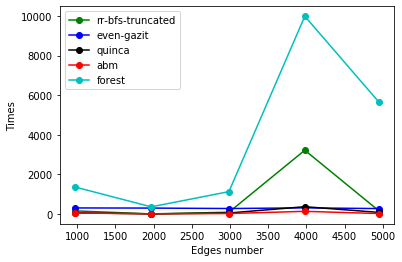

In [6]:
draw_plot(
    data_to_plot,
    '100',
    'insert_edge'
)
plt.show()

## Resultados de los 3 más rápidos

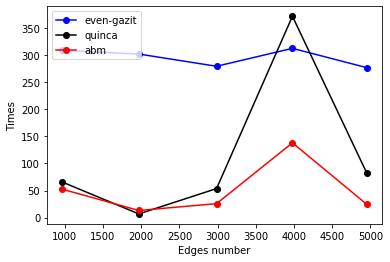

In [7]:
draw_plot(data_to_plot, '100', 'insert_edge', algoritms=['even-gazit', 'quinca', 'abm'])
plt.show()

## Nodes 1.000 
 - Edges (10.000 - 50.000)

In [8]:
df = return_data_frame(data_to_plot['1000']['insert_edge'])
df

,rr-bfs-truncated,even-gazit,quinca,abm,forest
9872,0.2936919530232747 0.0015940279930269417,32.8912893931071 0.18014616688973115,0.0953992207845052 0.0005147781024395096,0.17800331115722656 0.000957403839685589,9.750938415527344 0.001102308231916741
20000,64.12986914316814 0.3512452036812874,31.891441345214844 0.1746699086808097,6.520875295003255 0.03570950540122945,7.016428311665853 0.03840665034922371,97.60855833689372 0.32740026205620115
30148,0.126949946085612 0.0006875434285684989,33.50671132405599 0.183516341208162,0.05936622619628906 0.0003167876601136951,0.1261631647745768 0.0006730124252448017,15.274715423583984 0.0009499264159261914
40123,0.11114279429117839 0.000601009062811064,31.897362073262535 0.17470211269346245,0.08887449900309244 0.0004802564559820914,0.11589527130126953 0.0006181687229433208,17.868471145629883 0.0016132319445709123
49447,119.15293534596762 0.6526197596461295,29.890425999959312 0.16371012140600633,9.517121315002441 0.052120710789509354,10.067510604858398 0.05512140296721014,237.70325183868408 1.0015663722980996


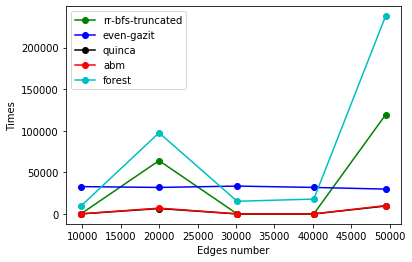

In [9]:
draw_plot(data_to_plot, '1000', 'insert_edge')

## Resultados de los 2 más rápidos

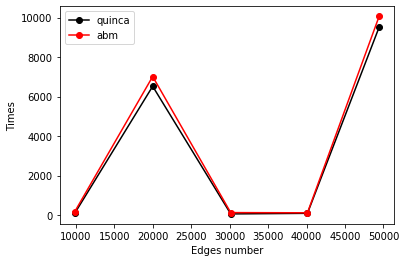

In [10]:
draw_plot(data_to_plot, '1000', 'insert_edge', algoritms=['quinca', 'abm'])

## Nodes 2.000 
 - Edges (40.000 - 200.000)

In [11]:
df = return_data_frame(data_to_plot['2000']['insert_edge'])
df

,rr-bfs-truncated,even-gazit,quinca,abm,forest
39849,77.62187321980794 0.42514471897963013,119.85708872477213 0.656477602233056,14.873687426249187 0.08146032701788439,23.80695343017578 0.13037574571591748,115.39525190989177 0.40344754443190095
80075,1.348710060119629 0.0073792189258385385,128.14470132191977 0.701869825304692,0.3715117772420247 0.0020280092941078374,0.25696754455566406 0.0013898626310861958,17.93076992034912 0.0003408264311380485
120850,2.0852486292521157 0.011413226693966806,132.51254558563232 0.7257937637941783,0.8501132329305012 0.004636358684196009,0.49868424733479816 0.0027110106286680883,22.41404851277669 0.002166154871360702
160063,0.2596457799275716 0.0014145284684664767,125.8736530939738 0.6894315023496934,0.1184860865275065 0.0006425358742019147,0.2130587895711263 0.001149274455660029,12.74874210357666 0.0011272198042355682
199565,22.85062472025553 0.1251492902903167,130.4904301961263 0.714718496877596,4.901742935180664 0.026841197261525406,4.72246011098226 0.025844230189939203,77.89107163747151 0.08484013240912736


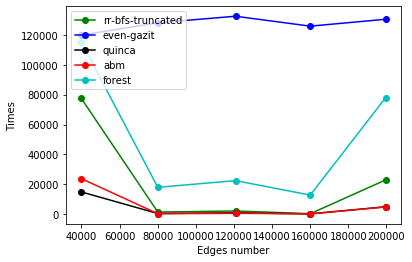

In [12]:
draw_plot(data_to_plot, '2000', 'insert_edge')

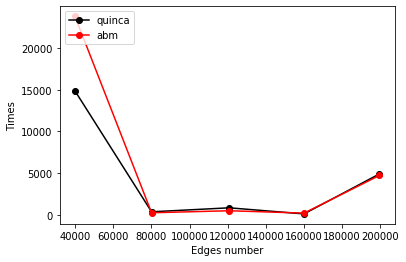

In [13]:
draw_plot(data_to_plot, '2000', 'insert_edge', algoritms=['quinca', 'abm'])

------------------------------------------------------
# Inserción de Peor Caso

## Nodes 100
 - Edges (1.000 - 5.000)


In [14]:
df = return_data_frame(data_to_plot['100']['insert_worst_edge'])
df

,rr-bfs-truncated,even-gazit,quinca,abm,forest
969,2.182912826538086 0.011949146189562726,0.3139972686767578 0.001713574767499016,0.3857612609863281 0.002106507272970371,0.23402372996012372 0.0012669859494335526,4.68591054280599 0.016469680462073973
1969,3.4371693929036455 0.01881917245139353,0.2972602844238281 0.0016224428282555897,0.4294474919637044 0.0023462368410314604,0.263516108194987 0.0014285673873718977,9.969790776570639 0.03769075391840308
2986,4.826458295186361 0.02642677493038934,0.32868385314941406 0.0017937462885914194,0.5153417587280273 0.002815483349416695,0.30953089396158856 0.0016773599809444875,13.653866449991861 0.04836411027131154
3979,5.613652865091959 0.03073999320244747,0.29942989349365234 0.0016342812328685942,0.48509438832600915 0.002650892353769482,0.2721548080444336 0.001475748376097581,17.15555191040039 0.06582581519098507
4952,6.723968187967936 0.036821125474688986,0.3009319305419922 0.0016420579314838726,0.49964586893717444 0.002730413973844983,0.2749840418497721 0.0014905242564655738,23.922959963480633 0.09135849387561104


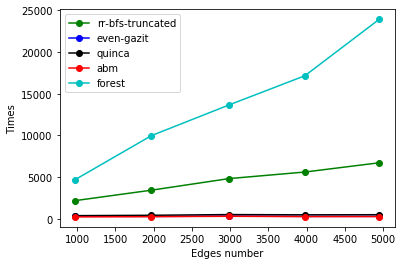

In [15]:
draw_plot(data_to_plot, '100', 'insert_worst_edge')

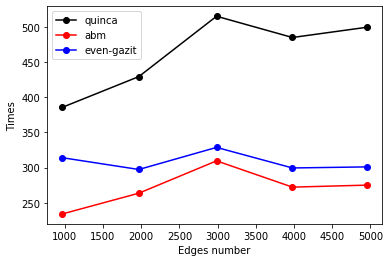

In [16]:
draw_plot(data_to_plot, '100', 'insert_worst_edge', algoritms=['quinca', 'abm', 'even-gazit'])

## Nodes 1.000
 - Edges (10.000 - 50.000)


In [17]:
df = return_data_frame(data_to_plot['1000']['insert_worst_edge'])
df

,rr-bfs-truncated,even-gazit,quinca,abm,forest
9872,206.66871070861816 1.131963402682469,32.063961029052734 0.17561506305588606,32.30705261230469 0.17694603516208368,22.47014840443929 0.12304971041856666,330.5612087249756 1.7131221633404667
20000,347.38303820292157 1.9026874259502846,33.06421438852946 0.18109354124786003,35.846805572509766 0.19633419569549826,26.236732800801594 0.14368464571319095,615.2924299240112 3.1579695949688498
30148,460.88623205820716 2.5243699771544574,31.989431381225586 0.17520666724219724,36.77945137023926 0.20144084101070384,27.405627568562828 0.15008645068955145,937.6794656117758 4.875840204044247
40123,588.8303518295288 3.2251485569929486,33.989715576171875 0.1861624048112155,40.726280212402344 0.22305864796406322,28.462918599446613 0.15587747215671974,1414.4409020741782 7.310920625504489
49447,672.6079622904459 3.6840176978066395,32.32376575469971 0.17703780196341593,37.85425821940104 0.2073294216435475,28.163599967956543 0.15423862189733412,1541.387637456258 7.97413967762628


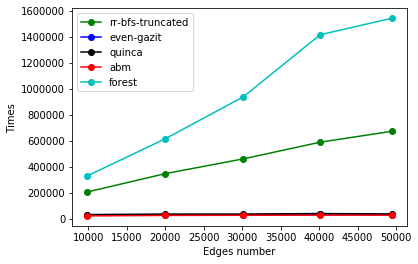

In [18]:
draw_plot(data_to_plot, '1000', 'insert_worst_edge')

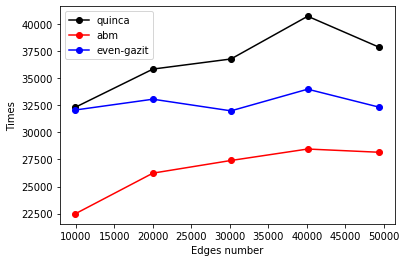

In [19]:
draw_plot(data_to_plot, '1000', 'insert_worst_edge', algoritms=['quinca', 'abm', 'even-gazit'])

## Nodes 2.000
 - Edges (40.000 - 200.000)

In [20]:
df = return_data_frame(data_to_plot['2000']['insert_worst_edge'])
df

,rr-bfs-truncated,even-gazit,quinca,abm,forest
39849,1284.6385399500527 7.03624718544738,129.29890155792236 0.708192540957597,141.3134018580119 0.7739983990922332,101.79408391316731 0.5575286261009053,2343.9599752426147 12.43099510394042
80075,2399.1103649139404 13.140460812844138,134.9410692850749 0.7390959213012556,163.86181513468426 0.8975012350281937,119.31917667388916 0.6535173772819467,5142.812244097391 27.32414407141803
120850,3320.3272422154746 18.18617345336933,135.32165686289468 0.7411807104664845,154.9343427022298 0.8486032745805492,114.28572336832681 0.6259485584677165,7739.154163996378 41.39432387929023
160063,4247.927570343018 23.266849198684938,136.57477696736652 0.7480440617707362,158.57327779134116 0.868534768066915,115.50215085347494 0.632610845957644,10513.912455240887 56.30088626271988
199565,5394.980605443319 29.54951732841677,134.27283763885498 0.7354357307482324,167.3357804616292 0.91652708053368,120.4385757446289 0.6596483533499323,13384.955350557962 71.6962707950158


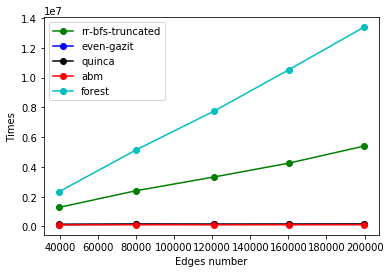

In [21]:
draw_plot(data_to_plot, '2000', 'insert_worst_edge')

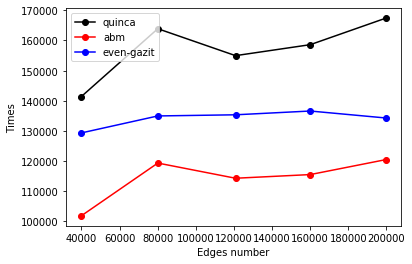

In [22]:
draw_plot(data_to_plot, '2000', 'insert_worst_edge', algoritms=['quinca', 'abm', 'even-gazit'])

------------------------------------------------------
# Actualización de arco en el peor caso

## Nodes 100
 - Edges (1.000 - 5.000)
 

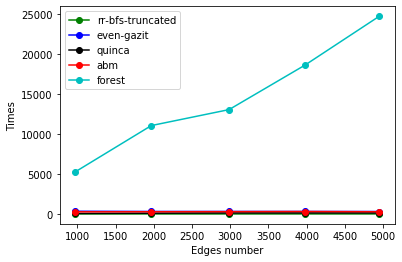

In [23]:
draw_plot(data_to_plot, '100', 'decrease_worst_edge')

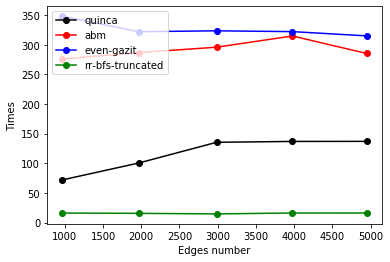

In [24]:
draw_plot(data_to_plot, '100', 'decrease_worst_edge', algoritms=['quinca', 'abm', 'even-gazit', 'rr-bfs-truncated'])

## Nodes 1.000
 - Edges (10.000 - 50.000)

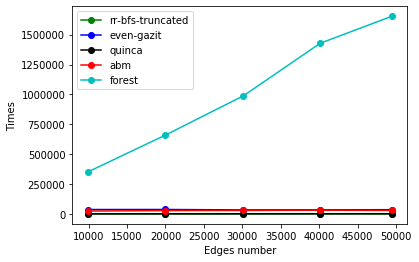

In [25]:
draw_plot(data_to_plot, '1000', 'decrease_worst_edge')

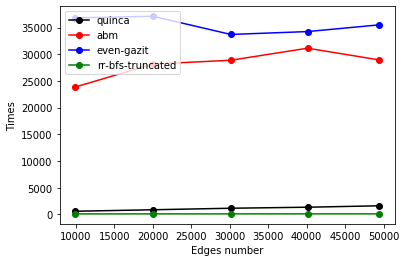

In [26]:
draw_plot(data_to_plot, '1000', 'decrease_worst_edge', algoritms=['quinca', 'abm', 'even-gazit', 'rr-bfs-truncated'])

## Nodes 2.000
 - Edges (40.000 - 200.000)

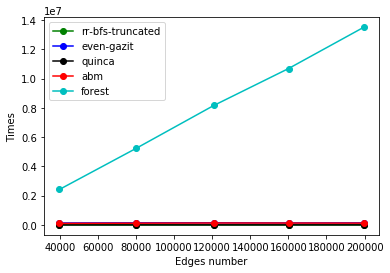

In [27]:
draw_plot(data_to_plot, '2000', 'decrease_worst_edge')

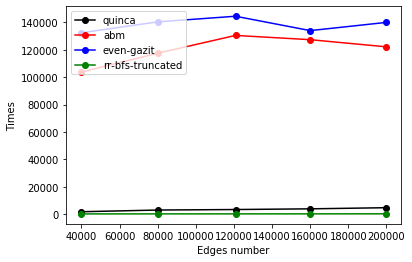

In [28]:
draw_plot(data_to_plot, '2000', 'decrease_worst_edge', algoritms=['quinca', 'abm', 'even-gazit', 'rr-bfs-truncated'])